سلمى شامل محمد لطفى موسى - salma.s.lotfi@gmail.com

Importing Libraries:

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

1- Load Image :

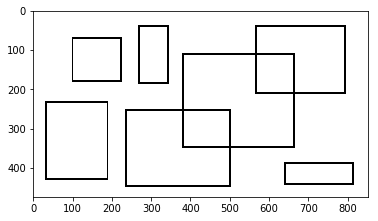

In [93]:
original_image = cv2.imread("C:\\Users\\clt\\Desktop\\ip\\squares.png" , 0)
plt.imshow(original_image , cmap=plt.get_cmap('gray'))

1- Harris Corner detection :

In [85]:
def Harris_Corner(img , window_size):
    #calculate derivatives in x and y direction
    I_x = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
    I_y = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)
    
    I_x_x = I_x * I_x
    I_x_y = I_x * I_y
    I_y_y = I_y * I_y
    
    corners = []
    
    result_img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
    
    offset = int(window_size / 2)
    
    for j in range(offset , img.shape[0] - offset):
        for i in range(offset , img.shape[1] - offset):
            S_x_x = np.sum(I_x_x[j - offset: j + offset + 1, i - offset : i + offset + 1])
            S_y_y = np.sum(I_y_y[j - offset: j + offset + 1, i - offset : i + offset + 1])
            S_x_y = np.sum(I_x_y[j - offset: j + offset + 1, i - offset : i + offset + 1])

            M_x_y = np.array([[S_x_x , S_x_y] , [S_x_y , S_y_y]])

            det = np.linalg.det(M_x_y)

            trace_M = S_x_x + S_y_y

            R = det - (0.04 * trace_M * trace_M)

            if R > 0 :
                result_img[j,i] = [255,0,255]
                
    return result_img
    

testing the function:

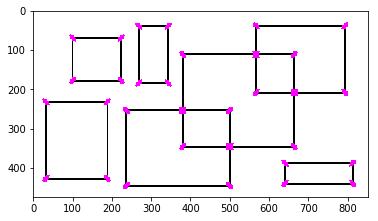

In [100]:
harris_corner = Harris_Corner(original_image , 10)

plt.imshow(harris_corner)

2- Compare with opencv function:

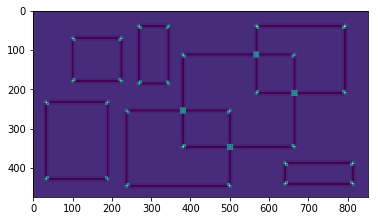

In [101]:
harris_corner_opencv = cv2.cornerHarris(original_image,10,5,0.04)
plt.imshow(harris_corner_opencv)